# Approach 3
- With Car_name being binary_encoded
- It means this time I have not dropped the column of car name but instead converted it into binary encoding. 
- Binary encoding is not as sparse as one-hot encoding.
- It was important not to drop the car name from the dataset as Car name is very important feature
- In real world, selling price would heavily depend on the car model. 

In [20]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [21]:
df = pd.read_csv("dataset/cleaned.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.head(2)

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,9,120000,Individual,Petrol,Manual,19.7,796,46.3,5,120000
1,Hyundai Grand,5,20000,Individual,Petrol,Manual,18.9,1197,82.0,5,550000


## Splitting Dataset

In [22]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [23]:
num_features = ["vehicle_age", "km_driven", "mileage", "engine","max_power", "seats"]
onehot_columns = ['seller_type','fuel_type','transmission_type']
binary_columns = ['car_name']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders.binary import BinaryEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
binary_transformer = BinaryEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, onehot_columns),
         ("StandardScaler", numeric_transformer, num_features),
        ("BinaryEncoder", binary_transformer, binary_columns)
        
    ]
)

In [24]:
X = preprocessor.fit_transform(X)

In [25]:
print(X.shape)
print(type(X))

(15411, 23)
<class 'numpy.ndarray'>


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Regressor

In [27]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
print(f"R2 score on train set:  {rf_model.score(X_train, y_train)}")
print(f"R2 score on test set: {rf_model.score(X_test, y_test)} ")

y_pred = rf_model.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred)}")

R2 score on train set:  0.9790896954471459
R2 score on test set: 0.9295917681749251 
Mean Absolute Error: 101394.95823549716
Root Mean Squared Error: 230221.70796438114


## Linear Regression

In [29]:
# Linear Regression model

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Metrics

print(f"R2 score on train set:  {linear_model.score(X_train, y_train)}")
print(f"R2 score on test set: {linear_model.score(X_test, y_test)} ")

y_pred = linear_model.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred)}")



R2 score on train set:  0.6279718547677425
R2 score on test set: 0.667671661220389 
Mean Absolute Error: 273522.354208716
Root Mean Squared Error: 500170.6927588081


## Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [32]:
linear_model_2 = LinearRegression()
linear_model_2.fit(X_train_poly, y_train)

LinearRegression()

In [33]:
# Metrics

print(f"R2 score on train set:  {linear_model_2.score(X_train_poly, y_train)}")
print(f"R2 score on test set: {linear_model_2.score(X_test_poly, y_test)} ")

y_pred = linear_model_2.predict(X_test_poly)

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred)}")

R2 score on train set:  0.8969902440705173
R2 score on test set: 0.5154347721380046 
Mean Absolute Error: 179529.70532382157
Root Mean Squared Error: 603963.47558098


# Approach 4
- With original dataset and improved cleaning.
- This time, I have handled outliers from every continuous numeric column.
- Instead of removing the outliers, I have capped these outliers to make sure I don't lose any data.

In [1]:
import pandas as pd
import numpy as np
import pickle

df = pd.read_csv("dataset/cardekho_dataset.csv")
df = df.drop(["Unnamed: 0", "brand", "model"], axis=1)

### Capping outliers

In [2]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col , '####')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df

In [3]:
df.head()

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
discrete_features=['vehicle_age', 'seats']
continuous_features=['km_driven', 'mileage', 'engine', 'max_power', 'selling_price']

for col in continuous_features:
         detect_outliers(col)


 #### km_driven ####
percentile25 30000.0
percentile75 70000.0
Upper limit 130000.0
Lower limit -30000.0

 #### mileage ####
percentile25 17.0
percentile75 22.7
Upper limit 31.25
Lower limit 8.450000000000001

 #### engine ####
percentile25 1197.0
percentile75 1582.0
Upper limit 2159.5
Lower limit 619.5

 #### max_power ####
percentile25 74.0
percentile75 117.3
Upper limit 182.25
Lower limit 9.050000000000011

 #### selling_price ####
percentile25 385000.0
percentile75 825000.0
Upper limit 1485000.0
Lower limit -275000.0


/tmp/ipykernel_9388/1855459046.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2159.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col]>upper_limit), col]= upper_limit


### Splitting, Transforming and Scaling Dataset 

In [5]:
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']

In [6]:
# Create Column Transformer with 3 types of transformers
num_features = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
onehot_columns = ['seller_type','fuel_type','transmission_type']
binary_columns = ['car_name']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders.binary import BinaryEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
binary_transformer = BinaryEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, onehot_columns),
         ("StandardScaler", numeric_transformer, num_features),
        ("BinaryEncoder", binary_transformer, binary_columns)
        
    ]
)

In [7]:
X= preprocessor.fit_transform(X)

In [21]:
feature_names = preprocessor.get_feature_names_out()

In [48]:
filename = "preprocessor.pkl"
with open(filename, "wb") as file:
    pickle.dump(preprocessor, file)

In [42]:
filename = 'one_hot_encoder.pkl'
with open(filename, 'wb') as file:
    pickle.dump(oh_transformer, file)

filename = 'binary_encoder.pkl'
with open(filename, 'wb') as file:
    pickle.dump(binary_transformer, file)

filename = 'standard_scaler.pkl'
with open(filename, 'wb') as file:
    pickle.dump(numeric_transformer, file)

In [8]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((12328, 23), (3083, 23))

### Training Linear Regression and Random Forest Regressor

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

### Linear Regression model

In [10]:
# Linear Regression model

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


# Metrics

print(f"R2 score on train set:  {linear_model.score(X_train, y_train)}")
print(f"R2 score on test set: {linear_model.score(X_test, y_test)} ")

y_pred = linear_model.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred)}")


R2 score on train set:  0.8379940051270459
R2 score on test set: 0.8343334568648284 
Mean Absolute Error: 118417.15082832648
Root Mean Squared Error: 155478.8344624024


### Random forest regressor

In [11]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

#metrics

print(f"R2 score on train set:  {rf_model.score(X_train, y_train)}")
print(f"R2 score on test set: {rf_model.score(X_test, y_test)} ")

y_pred = rf_model.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred)}")

R2 score on train set:  0.9886915352154048
R2 score on test set: 0.9321263650265217 
Mean Absolute Error: 65743.98005673103
Root Mean Squared Error: 99518.63840469492


## Model Selection 

##### From the metrics of both the models
---

##### Linear Regression
    - R2 Score: 0.8343334568648284
    - Mean Absolute Error : 118417.15082832648
    - Root Mean Squared Error: 155478.8344624024
---

##### Random Forest Regressor:
    - R2 Score: 0.9321263650265217
    - Mean Absolute Error : 65743.98005673103
    - Root Mean Squared Error: 99518.63840469492

### Saving the models

In [47]:
import pickle

filepath = "regression_model.pkl"
with open(filepath, 'wb') as file:
    pickle.dump(linear_model, file)

filepath = "random_forest_model.pkl"
with open(filepath, 'wb') as file:
    pickle.dump(rf_model, file)

### Feature Importance from Random Forest Regressor

#### Feature importance based on mean decrease in impurity

In [13]:
import time

import numpy as np

start_time = time.time()
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.048 seconds


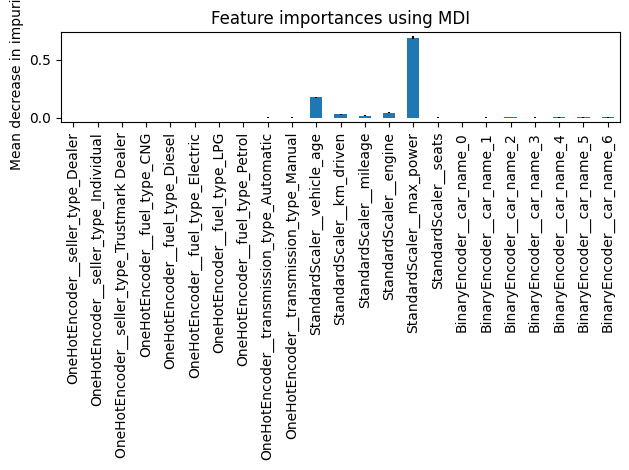

In [22]:
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### Feature importance based on feature permutation

In [24]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    rf_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 13.206 seconds


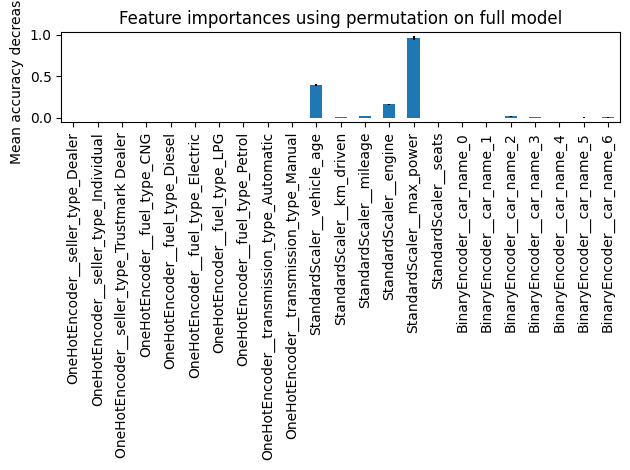

In [25]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()